In [4]:
import pandas as pd
df=pd.read_csv('/content/gender_submission.csv')
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0


In [8]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
  df[col]=Encoder.fit_transform(df[col])

In [10]:
x=df.iloc[:,0]
y=df.iloc[:1]

In [11]:
import numpy as np
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

In [16]:
from sklearn.model_selection import train_test_split


In [51]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
    )

In [52]:
from sklearn.linear_model import LogisticRegression


In [53]:
model=LogisticRegression(class_weight='balanced')


In [54]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
y_pred=model.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [58]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5952380952380952


In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print("TP FP")
print("FN TN")
print(cm)

Confusion Matrix:
TP FP
FN TN
[[50  0]
 [34  0]]


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
cm=confusion_matrix(y_test,y_pred,labels=[1,0])

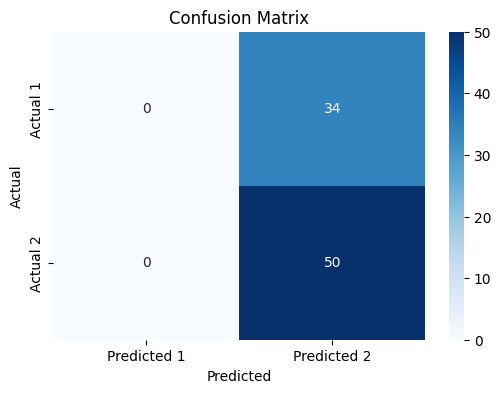

In [70]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=['Predicted 1','Predicted 2'],
            yticklabels=['Actual 1','Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [71]:
from sklearn.metrics import roc_curve,auc

In [72]:
y_prob=model.predict_proba(x_test)[:,1]

In [73]:
fpr,tpr,threshold=roc_curve(y_test,y_prob)

In [74]:
roc_auc=auc(fpr,tpr)
print("AUC:",roc_auc)


AUC: 0.5229411764705882
